In [182]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [183]:
def filterdata(gps, embedding, margin=25):
    positive_gps = []
    positive_embedding = []
    for i in range(len(gps)):
        for j in range(len(gps[i])):
            if gps[i][j] < margin:
                positive_gps.append(gps[i][j])
                positive_embedding.append(abs(1-embedding[i][j]))
    positive_gps = np.array(positive_gps).reshape(-1, 1)
    reg = LinearRegression().fit(positive_gps, positive_embedding)
    return positive_gps, positive_embedding, reg

def plotdata(positive_gps, positive_embedding, reg):
    positive_embedding_pred = reg.predict(positive_gps)    
    plt.scatter(positive_gps, positive_embedding)
    plt.plot(positive_gps, positive_embedding_pred, color='red', linewidth=3)
    plt.show()

## Bootstrapped Contrastive Loss

In [184]:
gps = np.genfromtxt('data/RegressionContrastive/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/RegressionContrastive/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


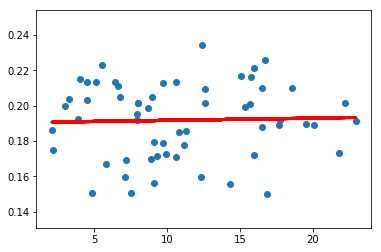

In [185]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

In [179]:
print(f'(Gradient, Intercept) = ({reg.coef_[0]}, {reg.intercept_})')

(Gradient, Intercept) = (0.00012401287438195565, 0.1904438511884503)


## Contrastive

In [180]:
gps = np.genfromtxt('data/Contrastive/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/Contrastive/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


0.018580754972449376


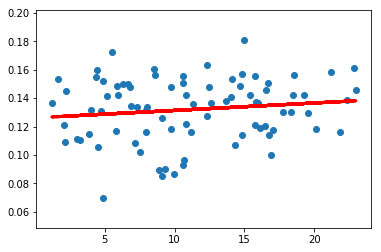

In [181]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)

In [168]:
print(f'(Gradient, Intercept) = ({reg.coef_[0]}, {reg.intercept_})')

[0.00052362] 0.12612148639881443


## Linear Overweighted Contrastive

In [186]:
gps = np.genfromtxt('data/Overweighted/gps.csv', delimiter=',')
embedding = np.genfromtxt('data/Overweighted/embedding.csv', delimiter=',')
print(f'No Points: {len(gps)}')

No Points: 1103


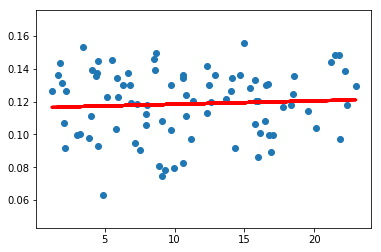

In [187]:
positive_gps, positive_embedding, reg = filterdata(gps, embedding)
plotdata(positive_gps, positive_embedding, reg)